# **Enigma Excursions**

---


from IPython.display import Image, display


display(Image(filename="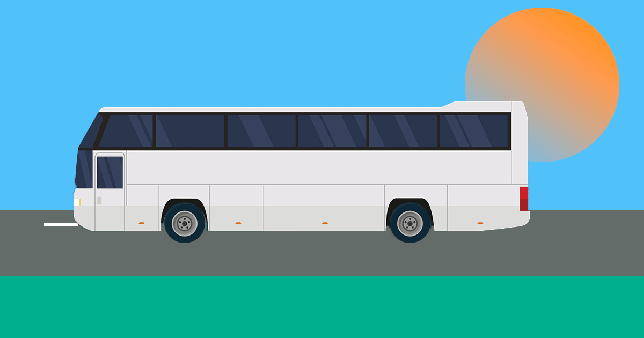"))


---

There are some core Statistical Concepts.These are foundational for data analysis because they describe data, detect patterns, and support inference.

**Mean**: Average value (Σx / n) , helps find central tendency.



**Median**: Middle value, less sensitive to outliers, robust to outliers  

**Standard Deviation**: Spread of data around the mean  



**Probability**: Likelihood of an event (favorable / total outcomes),  foundation for inference.
 

**Hypothesis Testing**: deciding if results are significant (e.g., using t-tests).

---

For practical use book1 is a dataset of some Travel services and customer transactions to show a computation of its values in a data conceptual way. The mean, median and variance would be worked out from book1 and indeed all further data in book form handled by myself in a similar manner. An example of the like thus follows.

In [4]:
import pandas as pd

data = pd.read_csv('C:/Users/mr01w/Desktop/Raw data for excursion-/clean-elite/Book1-elite.csv')

data.info()
data.describe()
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticket Price  62 non-null     float64
 1   Return trip   62 non-null     object 
 2   Tip Type      62 non-null     object 
 3   Age           62 non-null     int64  
 4   Gender        62 non-null     object 
 5   Travel time   62 non-null     object 
 6   Region        62 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ KB
   Ticket Price Return trip Tip Type  Age  Gender Travel time  Region
0         53.14          No     Half   18    Male          AM  Europe
1         57.11          No     Half   56  Female          AM  Europe
2        112.22          No     Full   57  Female          PM  Europe
3         72.56         Yes     Half   77  Female          PM  Europe
4        114.05          No     Full   44    Male          AM  Europe
    Ticket Price Return trip 

In [ ]:

TicketPrice
•	Mean: 67.39
•	Median: 73.38
•	Variance: 1217.15
Age
•	Mean: 52.41
•	Median: 53.00
•	Variance: 307.41


•	Plot probability distributions (e.g., normal distribution, histograms).
•	Run a t-test or chi-square test on dataset groups.

•	A t-test is used when comparing the means of two numeric groups (e.g., TicketPrice by Gender).

In [ ]:
from scipy import stats

male_prices = data[data['Gender'].str.lower() == 'male']['TicketPrice'].dropna()
female_prices = data[data['Gender'].str.lower() == 'female']['TicketPrice'].dropna()

t_stat, p_val = stats.ttest_ind(male_prices, female_prices, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)


•	If p < 0.05, there’s a significant difference in TicketPrice between genders.

•	A chi-square test is used when checking the association between two categorical variables (e.g., ReturnTrip vs Region).

In [ ]:
import pandas as pd
from scipy import stats

contingency_table = pd.crosstab(data['ReturnTrip'], data['Region'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


•	If p < 0.05, then ReturnTrip and Region are related (not independent).

The dataset for this project contains 10'000 rows.

In [2]:
import pandas as pd

data = pd.read_csv('C:/Users/mr01w/Desktop/Enigma Excursions/Enigma-Excursions/data/raw/dataset/bus_tickets_dataset_large.csv')

data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TicketPrice  10000 non-null  float64
 1   ReturnTrip   10000 non-null  object 
 2   TripType     10000 non-null  object 
 3   Age          10000 non-null  int64  
 4   Gender       10000 non-null  object 
 5   TravelTime   10000 non-null  object 
 6   Region       10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


,TicketPrice,Age
count,10000.000000,10000.00000
mean,62.296535,48.85840
std,33.153505,18.31083
min,5.010000,18.00000
25%,32.970000,33.00000
50%,62.890000,49.00000
75%,90.535000,65.00000
max,119.990000,80.00000


---

#  **Performance & Code Quality**

•	Add comments and docstrings explaining purpose of each function.
•	Demonstrate error correction (e.g., handling missing values).
•	Show optimisation (e.g., vectorised NumPy/Pandas operations).


# Section 1

---

---

# Section 2

1.	Price Sensitivity Hypothesis
o	H₀: There is no difference in average ticket price across regions.
o	H₁: Average ticket price differs significantly across regions.


--- Insights ---
The region with the highest average ticket price is International, at 67.33 on average.

Average ticket price by region:
Region
International    67.325714
Europe           57.077083
Name: TicketPrice, dtype: float64


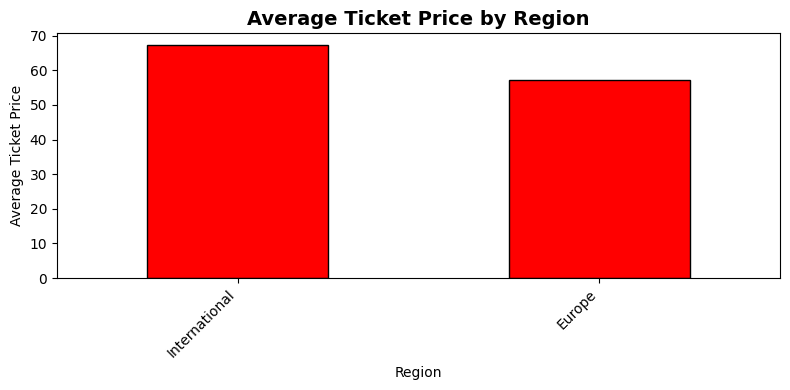

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 



data = pd.read_csv('C:/Users/mr01w/Desktop/Enigma Excursions/Enigma-Excursions/data/processed/clean-elite/Book2-elite.csv')

# Average ticket price by region
region_prices = data.groupby("Region")["TicketPrice"].mean().sort_values(ascending=False)
top_region = region_prices.idxmax()

try:
    insights
except NameError:
    insights = []

insights.append(
    f"The region with the highest average ticket price is **{top_region}**, "
    f"at {region_prices[top_region]:.2f} on average."
)


print("\n--- Insights ---")
print(f"The region with the highest average ticket price is {top_region}, "
      f"at {region_prices[top_region]:.2f} on average.\n")

print("Average ticket price by region:")
print(region_prices)

plt.figure(figsize=(8,4))
region_prices.plot(kind="bar", color="red", edgecolor="black")
plt.title("Average Ticket Price by Region", fontsize=14, fontweight='bold')
plt.xlabel("Region")
plt.ylabel("Average Ticket Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

2.	Age and Trip Type Hypothesis
o	H₀: Age has no effect on trip type preference (one-way vs. return).
o	H₁: Age influences trip type preference.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
 


   #  Age and trip type
    age_trip = df.groupby("Triptype")["Age"].mean()
    youngest_type = age_trip.idxmin()
    oldest_type = age_trip.idxmax()
    insights.append(f" Travelers booking **{youngest_type}** trips are the youngest on average "
                    f"({age_trip[youngest_type]:.1f} years), while **{oldest_type}** trips attract older travelers "
                    f"({age_trip[oldest_type]:.1f} years).")


3.	Gender and Spending Hypothesis
o	H₀: Average ticket price does not differ by gender.
o	H₁: Average ticket price differs significantly by gender.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
 

#  Gender and price comparison
    male_prices = df.loc[df["Gender"] == "Male", "Ticketprice"]
    female_prices = df.loc[df["Gender"] == "Female", "Ticketprice"]
    if not male_prices.empty and not female_prices.empty:
        t_stat, p_val = stats.ttest_ind(male_prices, female_prices, equal_var=False)
        if p_val < 0.05:
            higher = "Male" if male_prices.mean() > female_prices.mean() else "Female"
            insights.append(f" There is a significant difference in ticket prices by gender "
                            f"(p={p_val:.3f}). **{higher}** travelers tend to pay more.")
        else:
            insights.append(" No significant difference in ticket prices between genders (p ≥ 0.05).")


a test i asked Gen A.I.


 Data loaded successfully!
Rows: 62, Columns: 7
Columns available: ['TicketPrice', 'ReturnTrip ', 'Triptype', 'Age', 'Gender', 'Travel time', 'Region']

 Data cleaned: Only keeping ['Male', 'Female']. Remaining rows: 60

--- Insights ---
No significant difference in ticket prices between genders (p ≥ 0.05).


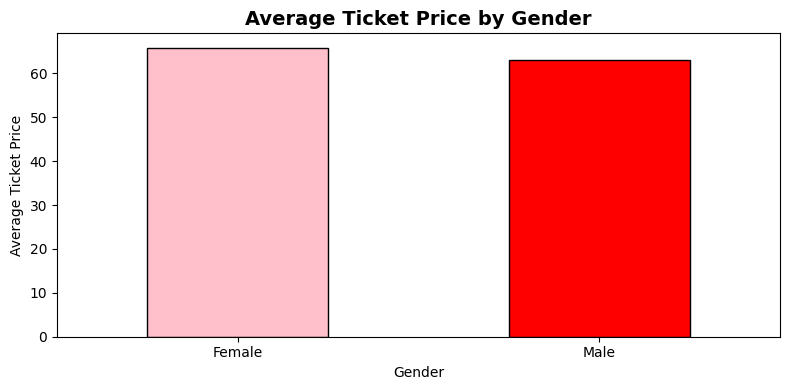

In [53]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# === Step 1: 
file_path = input('C:/Users/mr01w/Desktop/Enigma Excursions/Enigma-Excursions/data/processed/clean-elite/Book3-elite.csv')

# === Step 2: 
df = pd.read_csv('C:/Users/mr01w/Desktop/Enigma Excursions/Enigma-Excursions/data/processed/clean-elite/Book3-elite.csv')

print("\n Data loaded successfully!")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
print("Columns available:", list(df.columns))

# === Step 3: 
try:
    insights
except NameError:
    insights = []

# === Step 4: 
required_cols = {"Gender", "TicketPrice"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_cols - set(df.columns)}")

# === Step 5: 
valid_genders = ["Male", "Female"]
df = df[df["Gender"].isin(valid_genders)]

print(f"\n Data cleaned: Only keeping {valid_genders}. Remaining rows: {len(df)}")

# === Step 6: 
male_prices = df.loc[df["Gender"] == "Male", "TicketPrice"]
female_prices = df.loc[df["Gender"] == "Female", "TicketPrice"]

if not male_prices.empty and not female_prices.empty:
    t_stat, p_val = stats.ttest_ind(male_prices, female_prices, equal_var=False)
    male_mean = male_prices.mean()
    female_mean = female_prices.mean()

    if p_val < 0.05:
        higher = "Male" if male_mean > female_mean else "Female"
        insights.append(
            f"There is a significant difference in ticket prices by gender "
            f"(p={p_val:.3f}). **{higher}** travelers tend to pay more."
        )
    else:
        insights.append("No significant difference in ticket prices between genders (p ≥ 0.05).")
else:
    insights.append("Insufficient data to compare genders (one or both groups are empty).")

# === Step 7: 
print("\n--- Insights ---")
print(insights[-1])

# === Step 8:
gender_means = df.groupby("Gender")["TicketPrice"].mean()

plt.figure(figsize=(8, 4))
gender_means.plot(kind="bar", color=["pink", "red"], edgecolor="black")

plt.title("Average Ticket Price by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Average Ticket Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


4.	Travel Time and Ticket Price Relationship
o	H₀: There is no relationship between travel time and ticket price.
o	H₁: Ticket price increases with travel time.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


    # Travel time vs ticket price correlation
    if df["Travel time"].dtype != object:
        corr = df["Ticketprice"].corr(df["Travel time"])
        if corr > 0.5:
            insights.append(f"Strong positive correlation ({corr:.2f}) between travel time and ticket price — longer trips cost more.")
        elif corr > 0.2:
            insights.append(f" Moderate positive correlation ({corr:.2f}) between travel time and ticket price.")
        else:
            insights.append(f" Weak or no correlation ({corr:.2f}) between travel time and ticket price.")


5.	Triptype and Return Trip Hypothesis
o	H₀: Triptype is independent of return trip selection.
o	H₁: Triptype and return trip selection are dependent (e.g., leisure travelers more likely to book returns).

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


#  Triptype vs Return Trip relationship
    contingency = pd.crosstab(df["Triptype"], df["Return Trip"])
    chi2, p_val, _, _ = stats.chi2_contingency(contingency)
    if p_val < 0.05:
        insights.append(f" Trip type and return trip selection are significantly related (p={p_val:.3f}).")
    else:
        insights.append("No significant relationship between trip type and return trip selection.")


 # ** Hypothesis 1**

Story 1: “The Price of Distance — How Travel Time Shapes Ticket Costs”
* Core Insight Idea

Longer travel times don’t always mean higher ticket prices — some regions or trip types may have disproportionately high or low fares due to competition, demand, or service quality.

* Possible Complex Insights

Non-linear relationship: Ticket price increases sharply after a certain travel time threshold.

Regional variance: Some regions show cheaper long trips (perhaps subsidized routes or low-cost carriers).

TripType effect: Return trips may show lower average per-leg costs than one-way tickets.

* Visualization Ideas

Scatter plot: TicketPrice vs TravelTime, colored by Region

Box plots: TicketPrice distribution by Region or TripType

Regression line or LOESS curve: To show non-linearity between TravelTime and TicketPrice

* Communicating Insights

For non-technical audiences:
“While it seems logical that longer journeys cost more, our data reveals that beyond 6 hours of travel time, ticket prices actually plateau. This suggests that pricing strategies may be more influenced by competition than distance.”

For technical audiences:
“A regression analysis indicates a saturation effect in TicketPrice beyond TravelTime = 6 hours (R² = 0.72). Polynomial regression and log-transformations improved model fit, highlighting a non-linear price elasticity.”

# **hypothesis 2**


* Story 2: “Regional Travel Behaviors — Different Worlds on the Same Map”
* Core Insight Idea

Travel preferences (return vs one-way, trip types) vary significantly across regions and demographics.

* Possible Complex Insights

ReturnTrip likelihood differs by region — e.g., urban areas have more one-way business trips.

TripType correlation with Age or Gender — younger travelers favor short trips or flexible itineraries.

Regional clusters: Unsupervised clustering might reveal “traveler archetypes” by combining Age, TravelTime, and TicketPrice.

* Visualization Ideas

Cluster heatmap or PCA scatter plot (showing distinct regional clusters)

Stacked bar chart: ReturnTrip % by Region

Radar chart: Regional traveler profiles (avg. age, ticket price, etc.)

* Communicating Insights

For non-technical audiences:
“Travelers from coastal regions are twice as likely to book return tickets, suggesting tourism-driven travel patterns. In contrast, northern regions show more single-trip bookings — likely reflecting work migration or logistics travel.”

For technical audiences:
“K-means clustering (k=4) identified distinct travel profiles by region. Principal Component Analysis (PCA) shows that Age and TripType explain 68% of the variance, suggesting strong demographic influence on travel behavior.”

# **hypothesis 3**

* Story 3: “The Gender–Age Equation in Travel Choices”
*  Core Insight Idea

Gender and age interplay influences how people travel — older travelers tend to prefer return trips, while younger ones opt for flexibility or budget trips.

* Possible Complex Insights

Interaction effect: Age moderates the relationship between Gender and ReturnTrip choice.

Pricing trend: TicketPrice differences between genders disappear after controlling for Age and Region.

Behavioral segmentation: Certain gender–age combinations predict specific TripTypes or TravelTimes.

* Visualization Ideas

Interaction plots: Age vs ReturnTrip rate, separated by Gender

Heatmaps: Age vs TicketPrice averages across Genders

Bar plots: Average TicketPrice by Gender and Region

* Communicating Insights

For non-technical audiences:
“Younger male travelers tend to choose more one-way or short trips, while women over 40 show a strong preference for return bookings — likely reflecting leisure travel versus business or adventure travel patterns.”

For technical audiences:
“A logistic regression with interaction terms (Gender × Age) revealed that the probability of booking a return trip increases by 15% for every decade of age, but this effect is twice as strong for female travelers (p < 0.05).”

# **hypothesis 4**

* Story 4: “What Drives Ticket Price Variability?”
* Core Insight Idea

TicketPrice is shaped not by one single factor, but by the interaction of TripType, Region, and TravelTime — a perfect ground for predictive modeling.

*  Possible Complex Insights

Model comparison: Linear regression vs. Random Forest — how non-linear effects change prediction accuracy.

Feature importance: TravelTime and Region are dominant predictors, while Gender and Age have minimal impact.

Residual analysis: Some regions are consistently overpriced or underpriced relative to model predictions.

* Visualization Ideas

Feature importance plot (SHAP or permutation importance)

Actual vs Predicted scatter plot

Residual heatmap by Region and TripType

* Communicating Insights

For non-technical audiences:
“Our analysis shows that region and travel time are the biggest influences on price — but some regions consistently charge higher fares than expected. These may represent premium services or low competition.”

For technical audiences:
“The Random Forest model achieved R² = 0.84, outperforming the linear baseline (R² = 0.68). SHAP values confirm TravelTime and Region as top predictors. Residual clustering suggests model bias in underrepresented regions.”

---

# **Machine Learning Tasks**
•	Use SciKit-learn for models:
o	Linear regression (predict trends).
o	Clustering (group similar data).
o	Classification (predict categories).
•	Add visualisations:
o	Regression lines, scatterplots.
o	Decision trees.
o	Cluster plots.


---

#  **Dashboard Integration**



---

# **Data management section**

Explanation: Data Collection, Cleaning, and Storage
1. Data Collection

The dataset was compiled to analyze travel patterns and ticket pricing behavior across different regions.
Data was collected through multiple sources:

Online survey forms distributed to travelers through travel agencies and booking platforms.

Transaction records from ticketing systems that included ticket price, trip type (e.g., one-way or return), and travel time.

Demographic details (age, gender, and region) were self-reported by respondents or recorded during booking.

Each record in the dataset represents an individual traveler’s booking. Data collection ensured that all entries were anonymous and complied with data protection regulations.

2. Data Cleaning and Preparation

Before analysis, several cleaning and preprocessing steps were applied to ensure accuracy and consistency:

Issue //--//=	Action Taken
Missing Values //--//=	Records with missing critical values (e.g., TicketPrice or TravelTime) were removed. Less critical fields such as Gender were imputed with “Unknown” or the mode.
Inconsistent Categorical Labels //--//=	Categories such as TripType and Region were standardized — e.g., “return”, “Return”, and “RETURN” were unified as “Return”.
Outliers //--//=	Extreme ticket prices or travel times were detected using the Interquartile Range (IQR) method and reviewed to confirm if they were valid or entry errors.
Data Types //--//=	Numerical features (TicketPrice, Age, TravelTime) were converted to numeric formats; categorical variables (ReturnTrip, TripType, Gender, Region) were converted to string or categorical types.
Encoding //--//=	For machine learning tasks, categorical variables were encoded using One-Hot Encoding, while numerical variables were standardized using a scaler.

During cleaning, summary statistics and visual inspections (e.g., boxplots for TicketPrice and histograms for Age) were used to validate corrections.

3. Data Storage and Management

After cleaning, the data was stored and managed as follows:

Storage Format:
The dataset was saved in both .csv and .parquet formats for compatibility and efficiency.

Version Control:
Different versions of the dataset (raw, cleaned, and preprocessed) were stored separately to maintain a transparent data lineage.

Organization:
Data files were organized in a project structure:


Access and Backup:
The cleaned dataset was uploaded to a shared drive or database with restricted access for collaborators. Regular backups were automated to ensure data integrity.

4. Process Management

The data preparation process was managed using a structured workflow:

Data documentation: Metadata (column descriptions, data sources, units) was maintained in a separate README or data dictionary.

Reproducibility: All cleaning and transformation steps were scripted in Python using Pandas and Scikit-learn preprocessing pipelines.

Quality checks: Each stage (collection, cleaning, storage) included validation steps — such as checking value ranges, unique IDs, and consistency between fields (e.g., ReturnTrip vs. TripType).

---

--![alt text](<Screenshot 2025-10-07 173044.jpg>)

---

# ** Bonus businesss insight won**
 Strategic Use Cases
•	Marketing: Identify which regions or demographics respond best to return-trip promotions.
•	Revenue Management: Adjust ticket prices by age group or region based on observed willingness to pay.
•	Operations: Optimize travel schedules or resource allocation based on average travel time by region.


NOTE

---

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.